In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace blanks with 0 and no changes are  record

In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"] .astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df["customerID"].duplicated().sum()

0

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand 

In [13]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return"no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


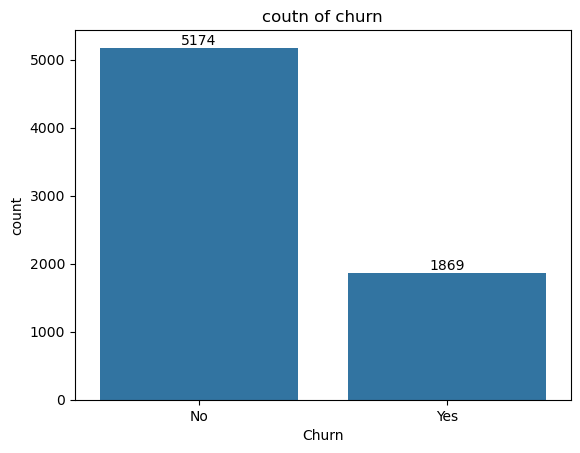

In [15]:
ax = sns.countplot(x = 'Churn',data = df)

ax.bar_label(ax.containers[0])
plt.title("coutn of churn")
plt.show()


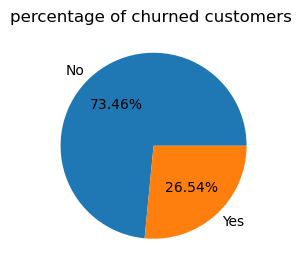

In [16]:
plt.figure(figsize = (3,4))

gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("percentage of churned customers ")
plt.show()

#form the given pie chart we can conclude that 26.54% of our customer have churned have out #not let's explore the reson behind it

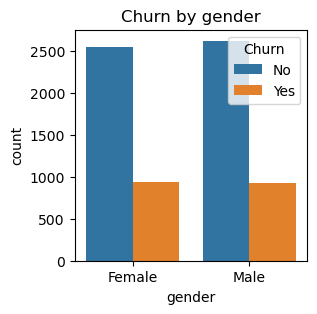

In [35]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender",data = df,hue = "Churn")
plt.title("Churn by gender")
plt.show()


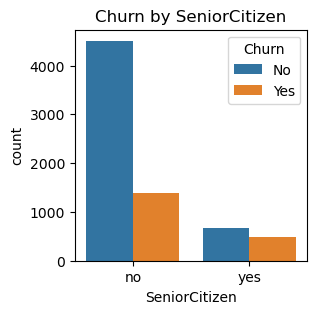

In [37]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen",data = df,hue = "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

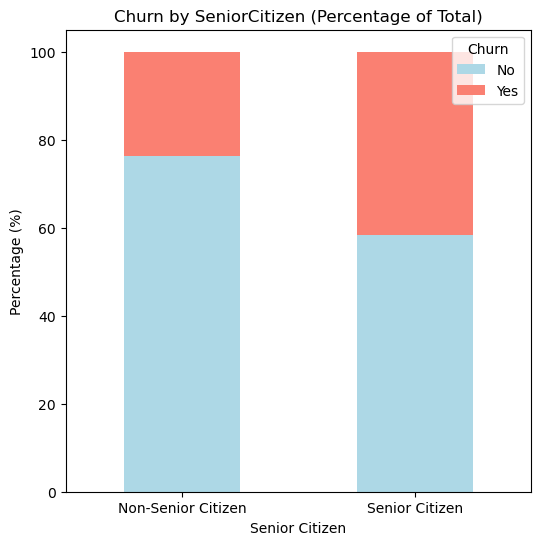

In [41]:
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
churn_percentage = churn_by_senior.div(churn_by_senior.sum(axis=1), axis=0) * 100

# Step 2: Plot the stacked bar chart
churn_percentage.plot(kind='bar', stacked=True, figsize=(6,6), color=["lightblue", "salmon"])

# Step 3: Customize the plot
plt.title("Churn by SeniorCitizen (Percentage of Total)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['Non-Senior Citizen', 'Senior Citizen'], rotation=0)  # Customizing x-ticks
plt.legend(title="Churn", labels=["No", "Yes"], loc='upper right')  # Customize legend labels
plt.show()

 # comparative a greated percentage of people in senior citizen category have churned

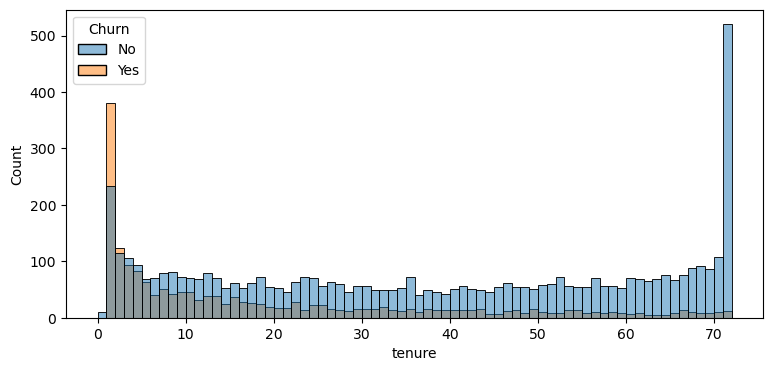

In [48]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df,bins = 72,hue = "Churn")
plt.show()

# people who have used our services for long time have stayed and people who  have used our services #1 or 2 monthss have churned

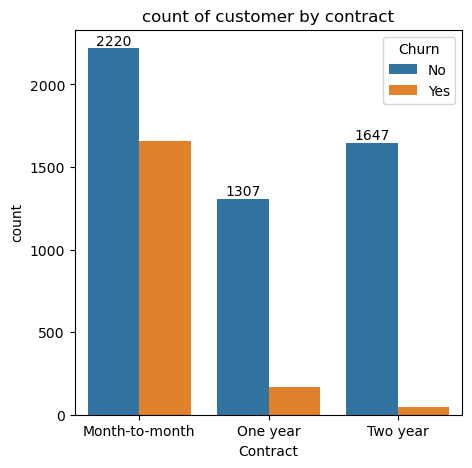

In [59]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by contract")
plt.show()

# people who have month contravt are likely to churn then form those who have 1 or 2 year or contract

In [66]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

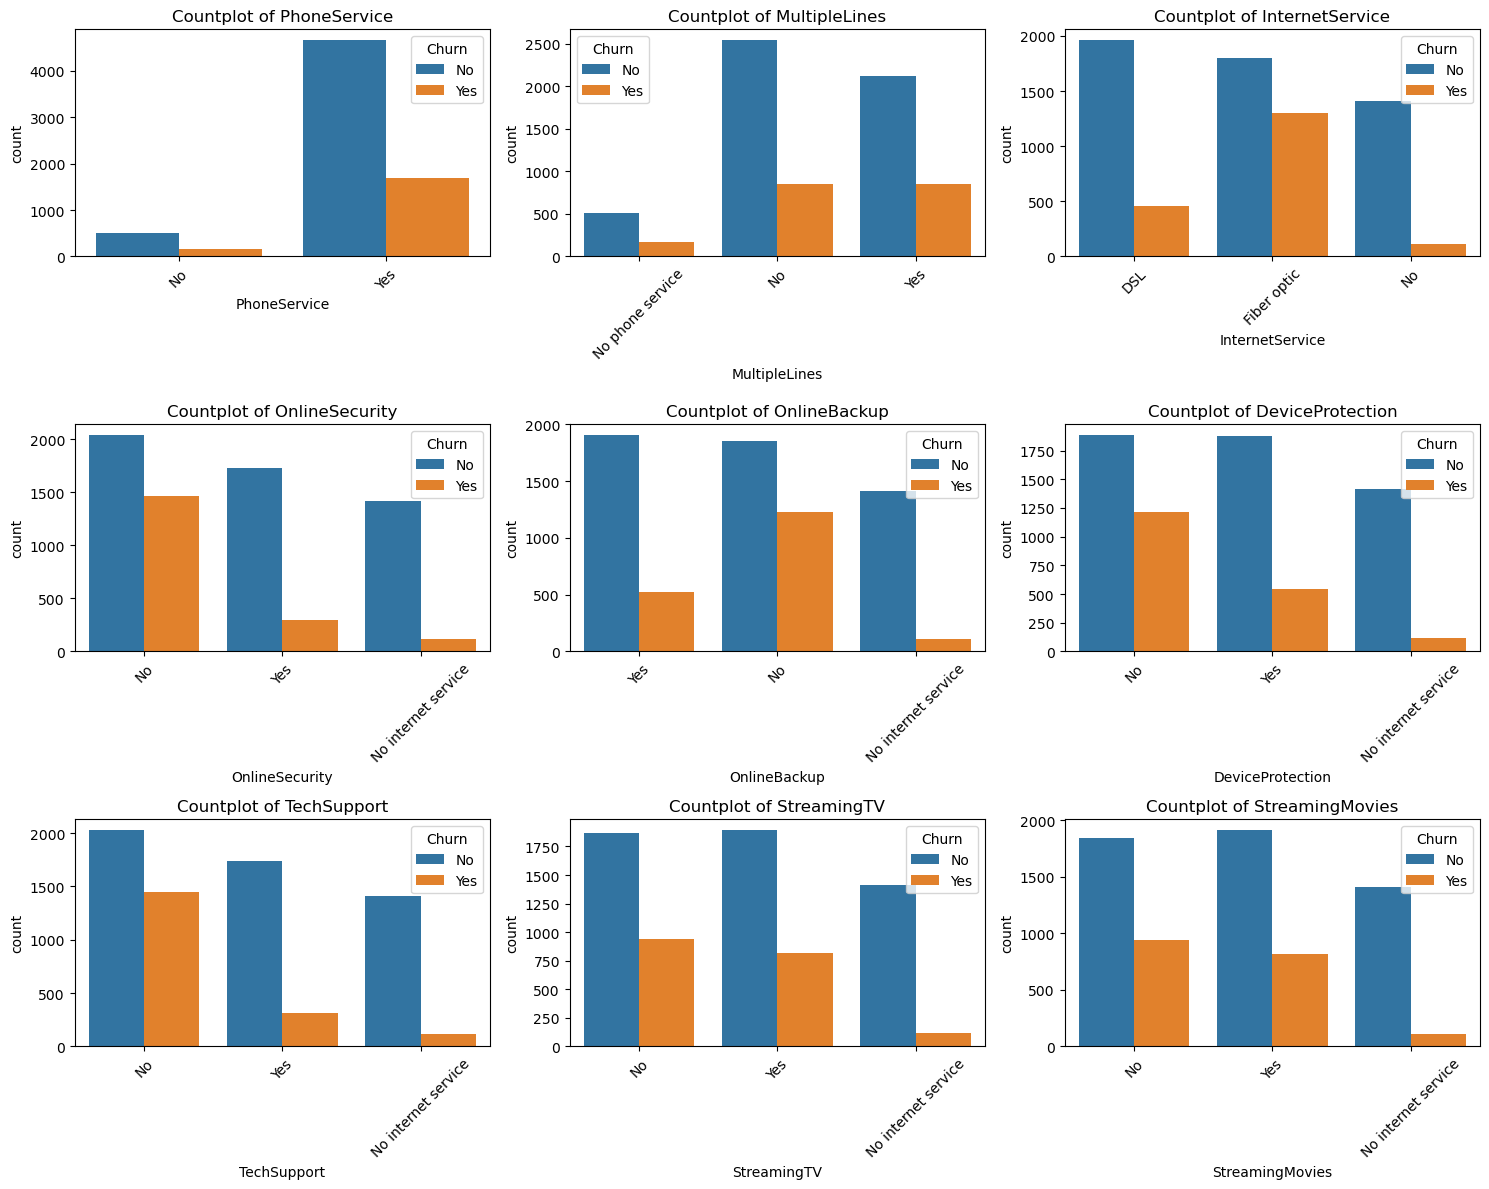

In [70]:


# List of columns for which we want to create countplots
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the number of rows and columns for the subplots
n_cols = 3  # You can adjust this based on how you want the layout
n_rows = (len(columns) // n_cols) + (1 if len(columns) % n_cols != 0 else 0)

# Create a figure with subplots
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop over each column and create a countplot
for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot at position i
    sns.countplot(x=col, data=df ,hue = df["Churn"])  # Create the countplot for the column
    plt.title(f"Countplot of {col}")  # Set the title for each plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#The visualizations depict customer churn trends across various telecom services. Key observations include higher churn rates for customers without optional services like OnlineSecurity, OnlineBackup, and TechSupport. Customers using Fiber optic internet and those lacking additional features like StreamingTV or StreamingMovies exhibit notably higher churn rates compared to others.

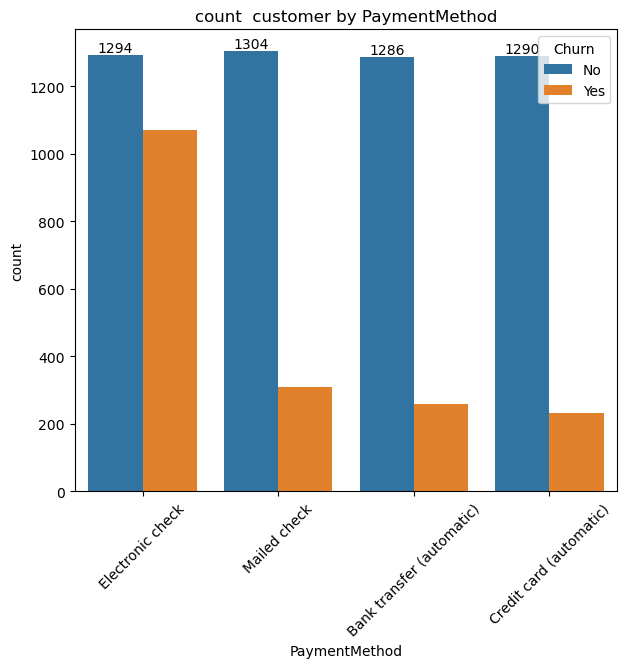

In [81]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x = "PaymentMethod",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count  customer by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method